## Geo-Python 2021 Final Exercise
### Bruno M. Carvalho (16/02/2022)
The final exercise in the Geo-Python course involves calculating and plotting seasonal weather anomalies to see how temperatures have changed in different seasons over the past 100+ years. We will be using weather data from the Sodankylä weather station in northern Finland.

1. Let's start by reading in the data:

In [1]:
import pandas as pd

data = pd.read_csv(
    "data/2315676.txt",
    delim_whitespace=True,
    skiprows=[1],
    na_values=[-9999],
    parse_dates=['DATE']
    )

Check if everything is ok:

In [2]:
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-01,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-02,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-03,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-04,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-05,NaN,4.0,-36.0


In [3]:
data.tail()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,2020-10-03,47.0,51.0,NaN
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,2020-10-04,43.0,47.0,37.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,2020-10-05,42.0,NaN,37.0
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,2020-10-06,45.0,46.0,43.0
41064,GHCND:FI000007501,SODANKYLA-AWS-FI,2020-10-07,47.0,50.0,44.0


In [4]:
# Check if all the data comes from a single station
data['STATION_NAME'].unique()

array(['SODANKYLA-AWS-FI'], dtype=object)

2. Fill in the missing values in the TAVG column with your estimates of the average daily temperature as noted above in the data section. You can then drop any average daily temperatures that are still missing.

In [5]:
data['TAVG_CALC'] = (data['TMAX'] + data['TMIN']) / 2

data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_CALC
0,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-01,NaN,2.0,-37.0,-17.5
1,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-02,NaN,6.0,-26.0,-10.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-03,NaN,7.0,-27.0,-10.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-04,NaN,-3.0,-27.0,-15.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-05,NaN,4.0,-36.0,-16.0


In [6]:
# Now drop any remaining rows with missing values in TAVG_CALC

# Quick check number of rows in df before removing NaN
print(f'Number of rows before missing data removal: {len(data)}')

# drop NaNs
data = data.dropna(subset=['TAVG_CALC'])

print(f'Number of rows after missing data removal: {len(data)}')

Number of rows before missing data removal: 41065
Number of rows after missing data removal: 38442


3. Define a function to convert temperature values from Fahrenheit to Celsius:

In [7]:
def fahr_to_celsius(temp_fahrenheit):
    """Converts temperature values from Fahrenheit to Celsius.
    
    Parameters:
    temp_fahrenheit = temperature in Fahrenheit (float)
    
    Return:
    temperature in celsius (float)
    """
    # Calculate the converted temperature value
    converted_temp = (temp_fahrenheit - 32) / 1.8
    
    # Return the converted value
    return converted_temp

And apply the new function over "TAVG_CALC" values:

In [8]:
data['TAVG_C'] = fahr_to_celsius(data['TAVG_CALC'])

data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_CALC,TAVG_C
0,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-01,NaN,2.0,-37.0,-17.5,-27.500000
1,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-02,NaN,6.0,-26.0,-10.0,-23.333333
2,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-03,NaN,7.0,-27.0,-10.0,-23.333333
3,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-04,NaN,-3.0,-27.0,-15.0,-26.111111
4,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-05,NaN,4.0,-36.0,-16.0,-26.666667


4. Calculate seasonal average temperatures. The seasons should include the following months:

- Winter: December, January, February
- Spring: March, April, May
- Summer: June, July, August
- Autumn: September, October, November

In [9]:
# Extract the month and year from 'DATE' for seasonal calculations
data['MONTH'] = data['DATE'].dt.month
data['YEAR'] = data['DATE'].dt.year

# define a season classifier function
def season(month):
    if month == 12 or month == 1 or month == 2:
        ssn = 'winter'
    elif month == 3 or month == 4 or month == 5:
        ssn = 'spring'
    elif month == 6 or month == 7 or month == 8:
        ssn = 'summer'
    elif month == 9 or month == 10 or month == 11:
        ssn = 'autumn'    
    return ssn

# apply the function into a new column
data['SEASON'] = data['MONTH'].apply(season)

data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_CALC,TAVG_C,MONTH,YEAR,SEASON
0,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-01,NaN,2.0,-37.0,-17.5,-27.500000,1,1908,winter
1,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-02,NaN,6.0,-26.0,-10.0,-23.333333,1,1908,winter
2,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-03,NaN,7.0,-27.0,-10.0,-23.333333,1,1908,winter
3,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-04,NaN,-3.0,-27.0,-15.0,-26.111111,1,1908,winter
4,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-05,NaN,4.0,-36.0,-16.0,-26.666667,1,1908,winter


5. Calculate seasonal average temperatures for the reference period 1951-1980 (e.g., 4 values in total, one for each season)

In [10]:
# subsetting to reference period
ref_temps = data.loc[(data['YEAR'] >= 1951) & (data['YEAR'] <= 1980)]

# create de groups (identify grouping variable) and calculate grouped means
ref_temps = ref_temps.groupby('SEASON').mean()

# reset the YEARMO index to access it later
ref_temps = ref_temps.reset_index()[['SEASON', 'TAVG_C']]

# rename columns to avoid confusion after joins
new_names = {"TAVG_C": "SEASON_TAVG_C"}
ref_temps = ref_temps.rename(columns=new_names)

ref_temps.head()

,SEASON,SEASON_TAVG_C
0,autumn,-0.893614
1,spring,-2.654668
2,summer,12.181331
3,winter,-13.835676


6. Calculate seasonal temperature anomalies for each year

In [11]:
# create "YEAR_SEASON" column for grouping

data['YEAR_SEASON'] = data['YEAR'].astype(str) + "_" + data['SEASON']

# group by year and season
anomalies = data.groupby('YEAR_SEASON').mean().reset_index()

# restore season column
anomalies['SEASON'] = anomalies['YEAR_SEASON'].str.slice(5)

# now finally merge the reference temp values
anomalies = anomalies.merge(ref_temps, on='SEASON', how='outer')

# calculate seasonal anomalies
anomalies['SEASON_ANOM'] = anomalies['TAVG_C'] - anomalies['SEASON_TAVG_C']

anomalies

,YEAR_SEASON,TAVG,TMAX,TMIN,TAVG_CALC,TAVG_C,MONTH,YEAR,SEASON,SEASON_TAVG_C,SEASON_ANOM
0,1908_autumn,NaN,36.920455,20.386364,28.653409,-1.859217,9.988636,1908.0,autumn,-0.893614,-0.965604
1,1909_autumn,NaN,39.853659,23.585366,31.719512,-0.155827,9.890244,1909.0,autumn,-0.893614,0.737787
2,1910_autumn,NaN,36.714286,21.014286,28.864286,-1.742063,9.871429,1910.0,autumn,-0.893614,-0.848450
3,1911_autumn,NaN,37.345679,22.049383,29.697531,-1.279150,9.975309,1911.0,autumn,-0.893614,-0.385536
4,1912_autumn,NaN,35.059524,21.476190,28.267857,-2.073413,9.964286,1912.0,autumn,-0.893614,-1.179799
...,...,...,...,...,...,...,...,...,...,...,...
447,2016_winter,9.611111,18.027778,0.555556,9.291667,-12.615741,4.416667,2016.0,winter,-13.835676,1.219935
448,2017_winter,14.638889,21.194444,6.055556,13.625000,-10.208333,4.944444,2017.0,winter,-13.835676,3.627342
449,2018_winter,11.170732,19.487805,1.536585,10.512195,-11.937669,5.585366,2018.0,winter,-13.835676,1.898006
450,2019_winter,14.058824,20.764706,5.029412,12.897059,-10.612745,4.823529,2019.0,winter,-13.835676,3.222930


7. Plot the data

In [12]:
# Split the dataset into the four seasons to facilitate plotting

winter_anomalies = anomalies.loc[anomalies['SEASON'] == 'winter'][['YEAR_SEASON', 'TAVG_C', 'SEASON_TAVG_C', 'SEASON_ANOM']]
spring_anomalies = anomalies.loc[anomalies['SEASON'] == 'spring'][['YEAR_SEASON', 'TAVG_C', 'SEASON_TAVG_C', 'SEASON_ANOM']]
summer_anomalies = anomalies.loc[anomalies['SEASON'] == 'summer'][['YEAR_SEASON', 'TAVG_C', 'SEASON_TAVG_C', 'SEASON_ANOM']]
autumn_anomalies = anomalies.loc[anomalies['SEASON'] == 'autumn'][['YEAR_SEASON', 'TAVG_C', 'SEASON_TAVG_C', 'SEASON_ANOM']]

winter_anomalies['YEAR'] = winter_anomalies['YEAR_SEASON'].str.slice(stop=4)
spring_anomalies['YEAR'] = spring_anomalies['YEAR_SEASON'].str.slice(stop=4)
summer_anomalies['YEAR'] = summer_anomalies['YEAR_SEASON'].str.slice(stop=4)
autumn_anomalies['YEAR'] = autumn_anomalies['YEAR_SEASON'].str.slice(stop=4)

winter_anomalies = winter_anomalies.set_index('YEAR')
spring_anomalies = spring_anomalies.set_index('YEAR')
summer_anomalies = summer_anomalies.set_index('YEAR')
autumn_anomalies = autumn_anomalies.set_index('YEAR')

winter_anomalies

,YEAR_SEASON,TAVG_C,SEASON_TAVG_C,SEASON_ANOM
YEAR,,,,
1908,1908_winter,-12.330779,-13.835676,1.504896
1909,1909_winter,-11.580933,-13.835676,2.254743
1910,1910_winter,-9.471767,-13.835676,4.363909
1911,1911_winter,-11.719409,-13.835676,2.116266
1912,1912_winter,-18.745098,-13.835676,-4.909422
...,...,...,...,...
2016,2016_winter,-12.615741,-13.835676,1.219935
2017,2017_winter,-10.208333,-13.835676,3.627342
2018,2018_winter,-11.937669,-13.835676,1.898006


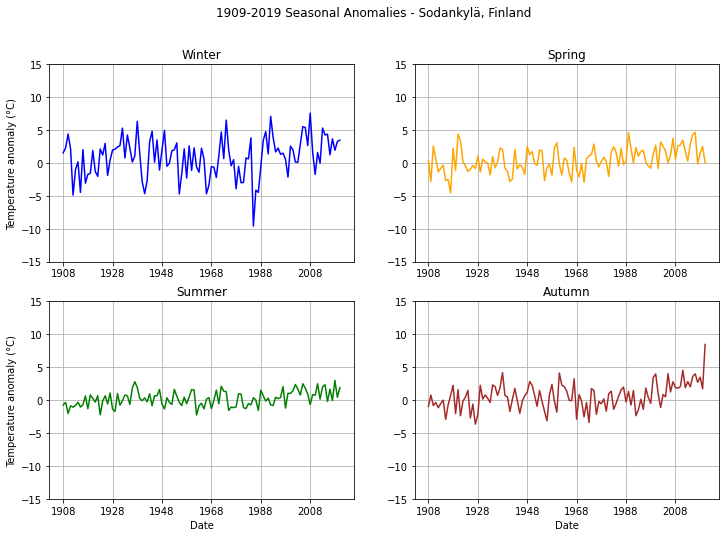

In [13]:
import matplotlib.pyplot as plt

# Set the figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

# Set the plot line width
line_width = 1.5

# Plot data
winter_anomalies.plot(
    ax=ax11, 
    y='SEASON_ANOM',
    #x='YEAR',
    c="blue", 
    lw=line_width, 
    ylim=[-15, 15],
    grid=True,
    legend=False
)

spring_anomalies.plot(
    ax=ax12, 
    y='SEASON_ANOM',
    #x='YEAR',
    c="orange", 
    lw=line_width, 
    ylim=[-15, 15],
    grid=True,
    legend=False
)

summer_anomalies.plot(
    ax=ax21, 
    y='SEASON_ANOM',
    #x='YEAR',
    c="green", 
    lw=line_width, 
    ylim=[-15, 15],
    grid=True,
    legend=False
)

autumn_anomalies.plot(
    ax=ax22, 
    y='SEASON_ANOM',
    #x='YEAR',
    c="brown", 
    lw=line_width, 
    ylim=[-15, 15],
    grid=True,
    legend=False
)

# Set figure title
fig.suptitle("1909-2019 Seasonal Anomalies - Sodankylä, Finland")

# Axis labels
ax11.set_xlabel("")
ax12.set_xlabel("")
ax21.set_xlabel("Date")
ax22.set_xlabel("Date")

ax11.set_ylabel("Temperature anomaly (°C)")
ax21.set_ylabel("Temperature anomaly (°C)")


# Season titles
ax11.title.set_text('Winter')
ax12.title.set_text('Spring')
ax21.title.set_text('Summer')
ax22.title.set_text('Autumn')

# Display plot
fig

# Save the plot as a png file:
outputfp = "img/seasonal_anomalies_Sodankyla.png"

# Save output plot
plt.savefig(outputfp)